# Ejercicios con datos de tipo datetime

### Programación para Analítica de Datos
### Mtra. Gisel Hernández Chávez

__Contenido:__

1. Objetos de datetime
2. Manipulación de datos del tipo datetime
3. Usos de la variable _

__Referencias:__

https://docs.python.org/3/library/datetime.html

https://www.delftstack.com/howto/python-pandas/how-to-convert-dataframe-column-to-datetime-in-pandas/

https://towardsdatascience.com/working-with-datetime-in-pandas-dataframe-663f7af6c587
https://www.analyticsvidhya.com/blog/2020/05/datetime-variables-python-pandas/


In [1]:
import pandas as pd
import time
import datetime
from datetime import datetime, timedelta, date
from pandas import DataFrame

In [17]:
import matplotlib.pyplot as plt
import statsmodels as st

### Objetos "conscientes" (_aware_) e "ingenuo" (_näive_)
https://docs.python.org/3/library/datetime.html

Los objetos de fecha y hora pueden clasificarse como "conscientes" o "ingenuos" dependiendo de si incluyen o no información de zona horaria.

Con suficiente conocimiento de los ajustes de tiempo políticos y algorítmicos aplicables, como la zona horaria y la información del horario de verano, un objeto consciente puede ubicarse en relación con otros objetos conscientes. Un objeto consciente representa un momento específico en el tiempo que no está abierto a interpretación.

Un objeto ingenuo no contiene suficiente información para ubicarse inequívocamente en relación con otros objetos de fecha/hora. Si un objeto ingenuo representa la hora universal coordinada (UTC), la hora local o la hora en alguna otra zona horaria depende exclusivamente del programa, al igual que depende del programa si un número en particular representa metros, millas o masa. Los objetos ingenuos son fáciles de entender y trabajar con ellos, a costa de ignorar algunos aspectos de la realidad.

### Objetos timedelta

Un objeto timedelta representa una duración, o sea, la diferencia entre dos fechas u horas.

### Objetos date
Un objeto date representa una fecha (año, mes y día) en un calendario idealizado, el calendario gregoriano actual extendido indefinidamente en ambas direcciones.


### Significado de los elementos de formato de fecha

Ver tablas en https://docs.python.org/3/library/datetime.html#strftime-strptime-behavior

Un fragmento se puede ver en la siguiente imagen:
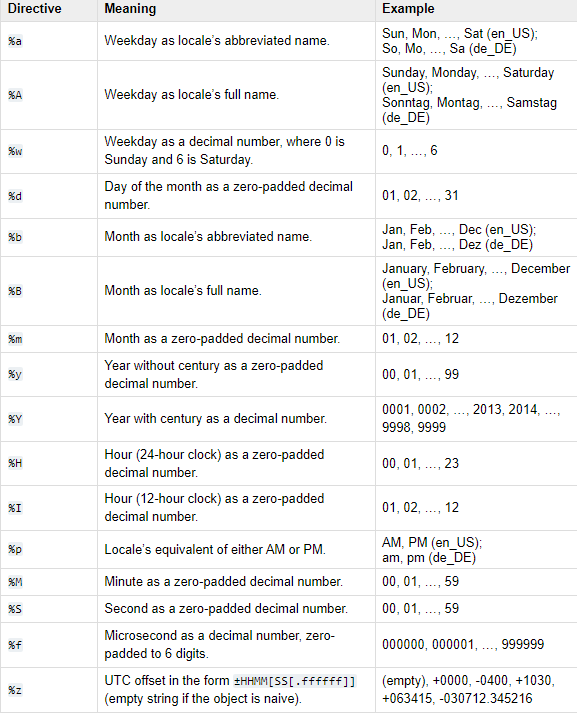

### Ejemplos de obtención de información sobre fecha y hora

In [10]:
#Ejemplos de obtención de información sobre fecha y hora
print("Día y fecha actual: " , datetime.now())
print("Año actual: ", date.today().strftime("%Y"))
print("Mes del año: ", date.today().strftime("%B"))
print("Número de la semana del año: ", date.today().strftime("%W"))
print("Día de la semana: ", date.today().strftime("%w"))
print("Día del año: ", date.today().strftime("%j"))
print("Día del mes: ", date.today().strftime("%d"))
print("Día de la semana: ", date.today().strftime("%A"))

Día y fecha actual:  2023-10-19 17:53:17.286426
Año actual:  2023
Mes del año:  October
Número de la semana del año:  42
Día de la semana:  4
Día del año:  292
Día del mes:  19
Día de la semana:  Thursday


### Ejercicios básicos

1. Determinar cuántos días faltan para una fecha dada (el cumpleaños, por ejemplo o Navidad)


In [12]:
#datetime.date?

today = date.today()
today

#today == date.fromtimestamp(time.time())

my_birthday = date(today.year, 9, 4)
if my_birthday < today:
    my_birthday = my_birthday.replace(year=today.year + 1)

#datetime.date(2008, 6, 24)
time_to_birthday = abs(my_birthday - today)
f' Días para mi próximo cumpleaños: {time_to_birthday.days}'


' Días para mi próximo cumpleaños: 321'

2. Convertir de cadena a datetime y luego imprimir con un formato dado

    Usar como caso de prueba: Jan 1 2014 2:43PM

    Salida esperada: 2014-07-01 14:43:00

In [4]:
#Write a Python program to convert a string to datetime.
#Sample String : Jan 1 2014 2:43PM
#Expected Output : 2014-07-01 14:43:00

datetime.strptime('Jan 1 2014 2:43PM', '%b %d %Y %I:%M%p') # Convierte

datetime.datetime(2014, 1, 1, 14, 43)

In [5]:
dt = datetime.strptime('Jan 1 2014 2:43PM', '%b %d %Y %I:%M%p') # Muestra con formato por defecto
print(dt)

2014-01-01 14:43:00


In [6]:
# Con formato esperado
print(dt.strftime('%Y-%m-%d %Y %H:%M:%S'))

2014-01-01 2014 14:43:00


### Generar columna con fecha a partir del día actual y diferencia de un día en cada nuevo registro.

+ Aquí la variable _ es desechable de propósito general. Ver al final de este notebook todos los usos

In [7]:
df = DataFrame.from_dict(
    {'Alfa': [1, 2, 3], 
     'Bravo': [4, 5, 6], 
     'Datetime': [datetime.strftime(datetime.now()-timedelta(days=_),
                                    "%m/%d/%Y, %H:%M:%S") for _ in range(3)]}, 
    orient='index', 
    columns=['A', 'B', 'C']).T

print(df)

  Alfa Bravo              Datetime
A    1     4  10/19/2023, 17:44:31
B    2     5  10/18/2023, 17:44:31
C    3     6  10/17/2023, 17:44:31


In [13]:
df.dtypes

Alfa        object
Bravo       object
Datetime    object
dtype: object

### Convertir el tipo de dato de la columna del DataFrame a datetime

In [14]:
df['Datetime'] = pd.to_datetime(df['Datetime'])
df

,Alfa,Bravo,Datetime
A,1,4,2023-10-19 17:44:31
B,2,5,2023-10-18 17:44:31
C,3,6,2023-10-17 17:44:31


In [15]:
df.dtypes

Alfa                object
Bravo               object
Datetime    datetime64[ns]
dtype: object

### Crear un DataFrame indizado por la columna de fecha y graficar una serie

In [16]:
df_serie = df.set_index(df['Datetime'], drop=True, append=False, inplace=False, verify_integrity=False)
df_serie 

,Alfa,Bravo,Datetime
Datetime,,,
2023-10-19 17:44:31,1,4,2023-10-19 17:44:31
2023-10-18 17:44:31,2,5,2023-10-18 17:44:31
2023-10-17 17:44:31,3,6,2023-10-17 17:44:31


(array([19647.75, 19648.  , 19648.25, 19648.5 , 19648.75, 19649.  ,
        19649.25, 19649.5 , 19649.75]),
 [Text(19647.75, 0, '10-17 18'),
  Text(19648.0, 0, '10-18 00'),
  Text(19648.25, 0, '10-18 06'),
  Text(19648.5, 0, '10-18 12'),
  Text(19648.75, 0, '10-18 18'),
  Text(19649.0, 0, '10-19 00'),
  Text(19649.25, 0, '10-19 06'),
  Text(19649.5, 0, '10-19 12'),
  Text(19649.75, 0, '10-19 18')])

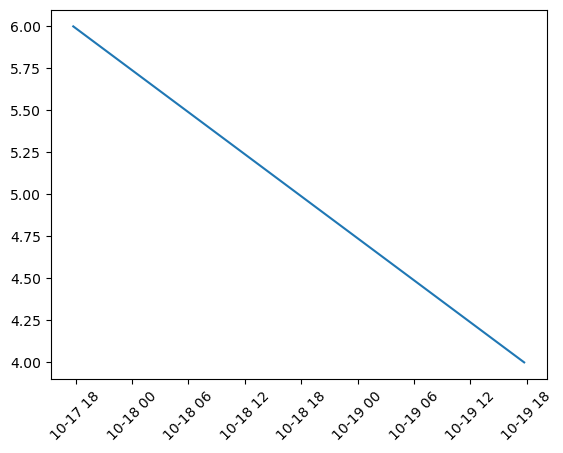

In [24]:
plt.plot(df_serie.index,df_serie.Bravo)
plt.xticks(rotation=45)

### Caso de fecha incorrecta

In [ ]:
# No hay ni día ni mes 32
df['Datetime'][0] = '32/09/2020, 09:27:02'

df['Datetime'] = pd.to_datetime(df['Datetime'],
                                format="%m/%d/%Y, %H:%M:%S",
                                errors='raise')
print(df)

### Caso con  errors='coerce' para que coloque NaT cuando encuentra error en la fecha-hora

In [ ]:
df = DataFrame.from_dict(
    {'Alfa': [1, 2, 3], 
     'Bravo': [4, 5, 6], 
     'Datetime': [datetime.strftime(datetime.now()-timedelta(days=_),
                                    "%m/%d/%Y, %H:%M:%S") for _ in range(3)]}, 
    orient='index', 
    columns=['A', 'B', 'C']).T
df['Datetime'][0] = '32/09/2020, 09:27:02'
df['Datetime'] = pd.to_datetime(df['Datetime'],
                                format="%m/%d/%Y, %H:%M:%S",
                                errors='coerce')
print(df)

### Caso con  errors='ignore' para que coloque el reesultado aunque sea incorrecto

In [ ]:
df = DataFrame.from_dict(
    {'Alfa': [1, 2, 3], 
     'Bravo': [4, 5, 6], 
     'Datetime': [datetime.strftime(datetime.now()-timedelta(days=_),
                                    "%m/%d/%Y, %H:%M:%S") for _ in range(3)]}, 
    orient='index', 
    columns=['A', 'B', 'C']).T

df['Datetime'][0] = '32/09/2020, 09:27:02'

df['Datetime'] = pd.to_datetime(df['Datetime'],
                                format="%m/%d/%Y, %H:%M:%S",
                                errors='ignore')
print(df)

### Usando apply y función lambda
+ El método apply() de Pandas Series aplica la función func a cada columna o fila.
+ Podríamos usar la función lambda en lugar de func por simplicidad.

In [ ]:
df = DataFrame.from_dict(
    {'Alfa': [1, 2, 3], 
     'Bravo': [4, 5, 6], 
     'Datetime': [datetime.strftime(datetime.now()-timedelta(days=_),
                                    "%m/%d/%Y, %H:%M:%S") for _ in range(3)]}, 
    orient='index', 
    columns=['A', 'B', 'C']).T

df['Datetime'] = df['Datetime'].apply(lambda _: datetime.strptime(_,"%m/%d/%Y, %H:%M:%S"))
           
df

In [ ]:
df = DataFrame.from_dict(
    {'Alfa': [1, 2, 3], 
     'Bravo': [4, 5, 6], 
     'DatetimeA': [datetime.strftime(datetime.now()-timedelta(days=_),
                                    "%m/%d/%Y, %H:%M:%S") for _ in range(3)],
     'DatetimeB': [datetime.strftime(datetime.now()-timedelta(days=_+3),
                                    "%m/%d/%Y, %H:%M:%S") for _ in range(3)]}, 
    orient='index', 
    columns=['A', 'B', 'C']).T

print(df)

### Usando astype()

In [ ]:
df = DataFrame.from_dict(
    {'Alfa': [1, 2, 3], 
     'Bravo': [4, 5, 6], 
     'Datetime': [datetime.strftime(datetime.now()-timedelta(days=_),
                                    "%m/%d/%Y, %H:%M:%S") for _ in range(3)]}, 
    orient='index', 
    columns=['A', 'B', 'C']).T

df['Datetime'] = df['Datetime'].astype('datetime64[ns]')

print(df)

### Usando el tiempo de época de Unix

+ Comienza el 1 de enero de 1970

In [ ]:
pd.to_datetime(0, unit='ns')

In [ ]:
pd.to_datetime(0, unit='s')

In [ ]:
pd.to_datetime(1490195805, unit='s')
#Timestamp('2017-03-22 15:16:45')

In [ ]:
pd.to_datetime(1490195805433502912, unit='ns')
#Timestamp('2017-03-22 15:16:45.433502912')

### Para extraer de una fecha completa sólo el año más el mes

In [ ]:
df['Datetime'].dt.to_period('M')

In [ ]:
df['AñoMes'] = df['Datetime'].dt.to_period('M')
df.head(2)

### Para extraer en columnas separadas

In [ ]:
df['yyyy'] = pd.to_datetime(df['Datetime']).dt.year
df['mm'] = pd.to_datetime(df['Datetime']).dt.month
df.head(2)

### _ tiene 3 usos convencionales principales en Python
Ver https://stackoverflow.com/questions/5893163/what-is-the-purpose-of-the-single-underscore-variable-in-python

1. Para mantener el resultado de la última expresión ejecutada en una sesión de interpretación interactiva. Este precedente fue establecido por el intérprete estándar de CPython, y otros intérpretes han seguido su ejemplo.

2. Para la búsqueda de traducción en i18n (consulte la documentación de gettext, por ejemplo), como en código como

    raise forms.ValidationError(_("Please enter a correct username"))

3. Como nombre de variable "desechable" de propósito general:

    + Para indicar que parte del resultado de una función se ignora deliberadamente (conceptualmente, se descarta), como en código como:

        label, has_label, _ = text.partition(':')

    + Como parte de una definición de función (usando def o lambda), donde la firma es fija (por ejemplo, mediante una devolución de llamada o API de clase principal), pero esta implementación de función en particular no necesita todos los parámetros, como en código como:

        def callback(_):
            return True

Este caso de uso puede entrar en conflicto con el caso de uso de búsqueda de traducción, por lo que es necesario evitar el uso de _ como una variable descartable en cualquier bloque de código que también lo use para la traducción de i18n (muchas personas prefieren un guión bajo doble, __, como su variable descartable exactamente por esta razón).

Los linters (herramientas que ayudan a detectar errores y corregirlos) a menudo reconocen este caso de uso. Por ejemplo, año, mes, día = fecha () generará una "advertencia de pelusa" (de linter) si el día no se usa más adelante en el código. La solución, si realmente no se necesita el día, es escribir año, mes, _ = fecha(). Lo mismo con las funciones lambda, lambda arg: 1.0 crea una función que requiere un argumento pero no lo usa, que será capturado por pelusa. La solución es escribir lambda _: 1.0. Una variable no utilizada a menudo oculta un error/error tipográfico (por ejemplo, establece el día pero usa dya en la siguiente línea).

La función de coincidencia de patrones agregada en Python 3.10 elevó este uso de "convención" a "sintaxis de lenguaje" en lo que respecta a las declaraciones de coincidencia: en los casos de coincidencia, _ es un patrón comodín, y el tiempo de ejecución ni siquiera vincula un valor al símbolo en Ese caso.

Para otros casos de uso, recuerde que _ sigue siendo un nombre de variable válido y, por lo tanto, seguirá manteniendo vivos los objetos. En los casos en que esto no sea deseable (por ejemplo, para liberar memoria o recursos externos), una llamada del nombre explícita satisfará a los linters de que se está utilizando el nombre y borrará rápidamente la referencia al objeto.

En el siguiente código indica que la variable del ciclo for no se usa